# MUHAMMAD WAJEEH ARIF


# PIAIC161905        Batch 35


# PANDAS ASSIGNMENT

## PART 1: 

HOW TO CLEAN DATA WITH PYTHON.
Cleaning US Census Data.
You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms?



# Inspect the Data!
1.
The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?


In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [46]:
pd.read_csv('states0.csv')


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F


In [68]:
print("Columns=",pd.read_csv('states0.csv').columns)
print("Shape=",pd.read_csv('states0.csv').shape)
print("Size=",pd.read_csv('states0.csv').size)
print("Isnull=",pd.read_csv('states0.csv').isnull().any())

Columns= Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Shape= (6, 11)
Size= 66
Isnull= Unnamed: 0    False
State         False
TotalPop      False
Hispanic      False
White         False
Black         False
Native        False
Asian         False
Pacific        True
Income        False
GenderPop     False
dtype: bool


2.It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them?
Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census


In [70]:
census_files = glob.glob('states*.csv')

df_list = []
for x in census_files:
    data = pd.read_csv(x)
    df_list.append(data)

census_files

['states0.csv',
 'states1.csv',
 'states2.csv',
 'states3.csv',
 'states4.csv',
 'states5.csv',
 'states6.csv',
 'states7.csv',
 'states8.csv',
 'states9.csv']

In [83]:
us_census = pd.concat(df_list, ignore_index=True)
us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
6,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


In [84]:
# Drop the column named "Unnamed" which is not required in data analysis
us_census.drop('Unnamed: 0', inplace=True, axis=1)
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
6,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
7,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
8,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
9,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


3.Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?


In [85]:
us_census.columns
us_census.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

ConversionError: Failed to convert value(s) to axis units: array(['0.03435374149659865%', '1.0586826347305378%',
       '0.16763157894736833%', '0.14686131386861315%',
       '0.35141038442336353%', nan, nan, '0.018599033816425123%', nan,
       '0.029608938547486034%', '0.05151006711409391%',
       '0.046601941747572824%', '0.046601941747572824%',
       '8.758860759493672%', '0.1271812080536914%',
       '0.02003210272873195%', '0.03262458471760798%',
       '0.055164034021871235%', '0.055164034021871235%', nan,
       '0.046438232642019836%', '0.039184397163120555%',
       '0.01566951566951567%', '0.03628509719222463%',
       '0.03628509719222463%', '0.0198087431693989%',
       '0.01954941860465116%', '0.032908545727136446%',
       '0.015045592705167175%', '0.10165706051873193%',
       '0.10165706051873193%', '0.07222222222222222%',
       '0.05714285714285715%', '0.5745213549337267%',
       '0.016095890410958904%', '0.031318681318681325%',
       '0.031318681318681325%', '0.04277108433734938%',
       '0.023450689726168417%', '0.05232611699677568%', nan,
       '0.022645358721523304%', '0.022645358721523304%',
       '0.10622009569377985%', '0.3453333333333332%',
       '0.019394128669581522%', '0.0012401352874859078%',
       '0.035833333333333335%', '0.035833333333333335%',
       '0.046978021978021964%', '0.04189189189189189%',
       '0.04315576534052599%', '0.06881576430074614%',
       '0.8259829059829059%', '0.8259829059829059%',
       '0.03060109289617486%', '0.06471527408195847%',
       '0.609896193771627%', '0.02644628099173554%',
       '0.020833333333333332%'], dtype=object)

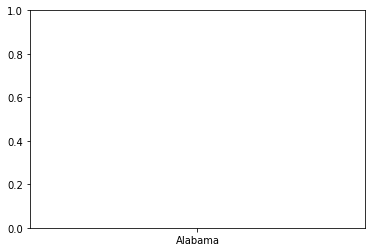

In [86]:
plt.hist(us_census)

4.Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

Start to make a plan for how to convert these columns into the right types for manipulation.

In [88]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


# Regex to the Rescue
5.
Use regex to turn the Income column into a format that is ready for conversion into a numerical type.


In [89]:
us_census['Income'].head()

0    $43296.35860306644
1    $70354.74390243902
2    $54207.82095490716
3    $41935.63396778917
4    $67264.78230266465
Name: Income, dtype: object

In [91]:
us_census['Income'] = us_census['Income'].replace('[\$,]','',regex=True)
us_census['Income'] = pd.to_numeric(us_census.Income)
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F
6,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F
7,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F
8,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F
9,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F


In [92]:
us_census.Income

0     43296.358603
1     70354.743902
2     54207.820955
3     41935.633968
4     67264.782303
5     64657.801787
6     64657.801787
7     76146.560588
8     61827.976636
9     75466.363636
10    50690.194987
11    50811.082051
12    50811.082051
13    73264.426282
14    48017.315436
15    59587.048875
16    48616.227848
17    53017.753041
18    53017.753041
19    53885.612648
20    45285.802536
21    44957.993761
22    49181.974359
23    78765.400725
24    78765.400725
25    72838.936726
26    51201.830037
27    62820.833959
28    38909.919207
29    49763.987726
30    49763.987726
31    47645.682836
32    55916.469697
33    55526.525074
34    68728.859589
35    76581.083417
36    76581.083417
37    47329.967871
38    64290.749113
39    49937.464137
40    58188.112195
41    49655.248466
42    49655.248466
43    48100.854267
44    54271.901818
45    56170.464510
46    20720.538286
47    59125.270833
48    59125.270833
49    46296.807763
50    51805.405405
51    47328.083617
52    55874.

6.
Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.
Split the column into those two new columns using str.split and separating out those results.


In [94]:
us_census.GenderPop

0       2341093M_2489527F
1         384160M_349215F
2       3299088M_3342840F
3       1451913M_1506295F
4     19087135M_19334329F
5       2648667M_2630239F
6       2648667M_2630239F
7       1751607M_1841615F
8         448413M_478041F
9         306674M_340810F
10     9600009M_10045763F
11      4883331M_5123362F
12      4883331M_5123362F
13        709871M_696428F
14        810464M_806083F
15      6316899M_6556862F
16      3235263M_3333382F
17      1534595M_1558931F
18      1534595M_1558931F
19      1439862M_1453125F
20      2164208M_2233145F
21      2261156M_2364097F
22        650081M_679019F
23             2872643M_F
24             2872643M_F
25      3249650M_3455936F
26      4861973M_5038598F
27      2692166M_2727005F
28      1451723M_1536358F
29      2964003M_3081445F
30      2964003M_3081445F
31              510163M_F
32        929606M_939759F
33      1407735M_1390901F
34        653484M_670717F
35      4343027M_4561386F
36      4343027M_4561386F
37      1032414M_1051703F
38     95418

In [95]:
us_census['Men'] = us_census['GenderPop'].str.split('(_)', expand=True)[0]
us_census['Women'] = us_census['GenderPop'].str.split('(_)', expand=True)[2]
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093M,2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160M,349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088M,3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913M,1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135M,19334329F
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667M,2630239F
6,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667M,2630239F
7,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1751607M,1841615F
8,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,448413M,478041F
9,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,306674M,340810F


7.
Convert both of the columns into numerical datatypes.
There is still an M or an F character in each entry! We should remove those before we convert.


In [98]:
us_census['Men'] = us_census['Men'].replace('M','',regex=True)
us_census.Men

0      2341093
1       384160
2      3299088
3      1451913
4     19087135
5      2648667
6      2648667
7      1751607
8       448413
9       306674
10     9600009
11     4883331
12     4883331
13      709871
14      810464
15     6316899
16     3235263
17     1534595
18     1534595
19     1439862
20     2164208
21     2261156
22      650081
23     2872643
24     2872643
25     3249650
26     4861973
27     2692166
28     1451723
29     2964003
30     2964003
31      510163
32      929606
33     1407735
34      653484
35     4343027
36     4343027
37     1032414
38     9541801
39     4795408
40      367963
41     5662893
42     5662893
43     1906944
44     1948453
45     6245344
46     1713860
47      510388
48      510388
49     2322409
50      423477
51     3167756
52    13171316
53     1459229
54     1459229
55      308573
56     4060948
57     3487725
58      913631
59     2851385
Name: Men, dtype: object

In [99]:
us_census['Women'] = us_census['Women'].replace('F','',regex=True)
us_census.Women

0      2489527
1       349215
2      3342840
3      1506295
4     19334329
5      2630239
6      2630239
7      1841615
8       478041
9       340810
10    10045763
11     5123362
12     5123362
13      696428
14      806083
15     6556862
16     3333382
17     1558931
18     1558931
19     1453125
20     2233145
21     2364097
22      679019
23            
24            
25     3455936
26     5038598
27     2727005
28     1536358
29     3081445
30     3081445
31            
32      939759
33     1390901
34      670717
35     4561386
36     4561386
37     1051703
38    10131373
39     5049925
40      353677
41     5913084
42     5913084
43     1942789
44     1990780
45     6534215
46     1869213
47      543273
48      543273
49     2455167
50      419713
51     3331859
52    13367298
53     1444150
54     1444150
55      318031
56     4195682
57     3497739
58      937789
59     2890732
Name: Women, dtype: object

In [100]:
us_census['Men'] = pd.to_numeric(us_census.Men)
us_census['Women'] = pd.to_numeric(us_census.Women)
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215.0
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295.0
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329.0
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
6,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
7,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1751607,1841615.0
8,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,448413,478041.0
9,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,306674,340810.0


8.
Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!

Use matplotlib to make a scatterplot!

plt.scatter(the_women_column, the_income_column) 
Remember to call plt.show() to see the graph!


Text(0, 0.5, 'us_census.Income')

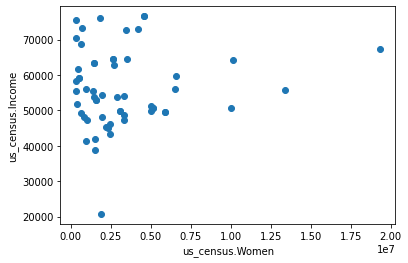

In [113]:
plt.scatter(us_census.Women,us_census.Income)
plt.show
plt.xlabel("us_census.Women")
plt.ylabel("us_census.Income")


9.
Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.
We can fill in those nans by using pandas’ .fillna() function.
You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.
Print out the Women column after filling the nan values to see if it worked!

In [114]:
us_census.Women.isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23     True
24     True
25    False
26    False
27    False
28    False
29    False
30    False
31     True
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
Name: Women, dtype: bool

In [115]:
us_census.Women.isnull().value_counts()

False    57
True      3
Name: Women, dtype: int64

In [116]:
check_Nan_example = us_census[['TotalPop', 'Men','Women']]
check_Nan_example.iloc[23]

TotalPop    5930538.0
Men         2872643.0
Women             NaN
Name: 23, dtype: float64

In [117]:
us_census['Women'] = us_census['Women'].fillna(us_census.TotalPop - us_census.Men)
us_census.Women

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23     3057895.0
24     3057895.0
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31      504536.0
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

In [118]:
us_census.Women.isnull().value_counts()

False    60
Name: Women, dtype: int64

10.
We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.


In [119]:
us_census.duplicated()


0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50    False
51    False
52    False
53    False
54     True
55    False
56    False
57    False
58    False
59    False
dtype: bool

In [120]:
us_census.duplicated().value_counts()


False    51
True      9
dtype: int64

11.
Drop those duplicates using the .drop_duplicates() function.

In [122]:
drop_us_census = us_census.drop_duplicates()
drop_us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215.0
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295.0
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329.0
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
7,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1751607,1841615.0
8,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,448413,478041.0
9,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,306674,340810.0
10,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,50690.194987,9600009M_10045763F,9600009,10045763.0


In [123]:
drop_us_census.duplicated().value_counts()

False    51
dtype: int64

12.
Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.


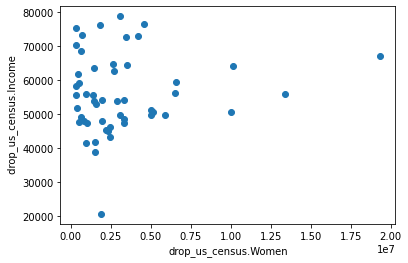

In [125]:
plt.scatter(drop_us_census.Women, drop_us_census.Income)
plt.xlabel('drop_us_census.Women')
plt.ylabel(' drop_us_census.Income')
plt.show() 


# Histograms of Races
13.
Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.


In [126]:
drop_us_census.columns


Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')

14.
Try to make a histogram for each one!

You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

In [127]:
drop_us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215.0
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295.0
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329.0
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
7,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1751607,1841615.0
8,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,448413,478041.0
9,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,306674,340810.0
10,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,50690.194987,9600009M_10045763F,9600009,10045763.0


In [129]:
# Remove the '%' sign from the data
us_census.Hispanic = us_census.Hispanic.replace('\%','',regex=True)
us_census.White = us_census.White.replace('\%','',regex=True)
us_census.Black = us_census.Black.replace('\%','',regex=True)
us_census.Native = us_census.Native.replace('\%','',regex=True)
us_census.Asian = us_census.Asian.replace('\%','',regex=True)
us_census.Pacific = us_census.Pacific.replace('\%','',regex=True)

us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,43296.358603,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,70354.743902,384160M_349215F,384160,349215.0
2,Arizona,6641928,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,54207.820955,3299088M_3342840F,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,41935.633968,1451913M_1506295F,1451913,1506295.0
4,California,38421464,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,67264.782303,19087135M_19334329F,19087135,19334329.0
5,Colorado,5278906,20.78438003220608,69.89557165861504,3.546376811594201,0.5738325281803548,2.661996779388082,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
6,Colorado,5278906,20.78438003220608,69.89557165861504,3.546376811594201,0.5738325281803548,2.661996779388082,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
7,Connecticut,3593222,15.604830917874388,67.6770531400966,10.34806763285027,0.12620772946859898,4.021980676328502,0.018599033816425123,76146.560588,1751607M_1841615F,1751607,1841615.0
8,Delaware,926454,8.82476635514019,64.63271028037383,20.743925233644834,0.25981308411214965,3.2686915887850483,NaN,61827.976636,448413M_478041F,448413,478041.0
9,District of Columbia,647484,9.165921787709499,33.103910614525134,51.77653631284915,0.20055865921787713,3.3832402234636865,0.029608938547486034,75466.363636,306674M_340810F,306674,340810.0


In [130]:
# Now convert all these to numeric type
us_census.Hispanic = pd.to_numeric(us_census.Hispanic)
us_census.White = pd.to_numeric(us_census.White)
us_census.Black = pd.to_numeric(us_census.Black)
us_census.Native = pd.to_numeric(us_census.Native)
us_census.Asian = pd.to_numeric(us_census.Asian)
us_census.Pacific = pd.to_numeric(us_census.Pacific)
us_census.dtypes

State         object
TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
GenderPop     object
Men            int64
Women        float64
dtype: object

In [131]:
print(us_census.Hispanic.isnull().value_counts())
print(us_census.White.isnull().value_counts())
print(us_census.Black.isnull().value_counts())
print(us_census.Native.isnull().value_counts())
print(us_census.Asian.isnull().value_counts())
print(us_census.Pacific.isnull().value_counts())

False    60
Name: Hispanic, dtype: int64
False    60
Name: White, dtype: int64
False    60
Name: Black, dtype: int64
False    60
Name: Native, dtype: int64
False    60
Name: Asian, dtype: int64
False    55
True      5
Name: Pacific, dtype: int64


In [132]:
us_census.Pacific

0     0.034354
1     1.058683
2     0.167632
3     0.146861
4     0.351410
5          NaN
6          NaN
7     0.018599
8          NaN
9     0.029609
10    0.051510
11    0.046602
12    0.046602
13    8.758861
14    0.127181
15    0.020032
16    0.032625
17    0.055164
18    0.055164
19         NaN
20    0.046438
21    0.039184
22    0.015670
23    0.036285
24    0.036285
25    0.019809
26    0.019549
27    0.032909
28    0.015046
29    0.101657
30    0.101657
31    0.072222
32    0.057143
33    0.574521
34    0.016096
35    0.031319
36    0.031319
37    0.042771
38    0.023451
39    0.052326
40         NaN
41    0.022645
42    0.022645
43    0.106220
44    0.345333
45    0.019394
46    0.001240
47    0.035833
48    0.035833
49    0.046978
50    0.041892
51    0.043156
52    0.068816
53    0.825983
54    0.825983
55    0.030601
56    0.064715
57    0.609896
58    0.026446
59    0.020833
Name: Pacific, dtype: float64

In [134]:
nan_Pacific_mean = us_census.Pacific.mean()
nan_Pacific_mean

0.28292707539332995

In [135]:
us_census.Pacific = us_census.Pacific.fillna(value=nan_Pacific_mean)
us_census.Pacific

0     0.034354
1     1.058683
2     0.167632
3     0.146861
4     0.351410
5     0.282927
6     0.282927
7     0.018599
8     0.282927
9     0.029609
10    0.051510
11    0.046602
12    0.046602
13    8.758861
14    0.127181
15    0.020032
16    0.032625
17    0.055164
18    0.055164
19    0.282927
20    0.046438
21    0.039184
22    0.015670
23    0.036285
24    0.036285
25    0.019809
26    0.019549
27    0.032909
28    0.015046
29    0.101657
30    0.101657
31    0.072222
32    0.057143
33    0.574521
34    0.016096
35    0.031319
36    0.031319
37    0.042771
38    0.023451
39    0.052326
40    0.282927
41    0.022645
42    0.022645
43    0.106220
44    0.345333
45    0.019394
46    0.001240
47    0.035833
48    0.035833
49    0.046978
50    0.041892
51    0.043156
52    0.068816
53    0.825983
54    0.825983
55    0.030601
56    0.064715
57    0.609896
58    0.026446
59    0.020833
Name: Pacific, dtype: float64

In [136]:
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160,349215.0
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088,3342840.0
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913,1506295.0
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135,19334329.0
5,Colorado,5278906,20.784380,69.895572,3.546377,0.573833,2.661997,0.282927,64657.801787,2648667M_2630239F,2648667,2630239.0
6,Colorado,5278906,20.784380,69.895572,3.546377,0.573833,2.661997,0.282927,64657.801787,2648667M_2630239F,2648667,2630239.0
7,Connecticut,3593222,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599,76146.560588,1751607M_1841615F,1751607,1841615.0
8,Delaware,926454,8.824766,64.632710,20.743925,0.259813,3.268692,0.282927,61827.976636,448413M_478041F,448413,478041.0
9,District of Columbia,647484,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609,75466.363636,306674M_340810F,306674,340810.0


Text(0, 0.5, 'Frequency of Occurance')

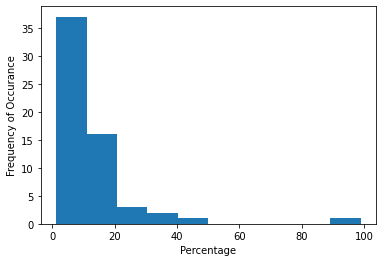

In [157]:
plt.hist(us_census.Hispanic)
plt.xlabel('Percentage')
plt.ylabel('Frequency of Occurance')



Text(0, 0.5, 'Frequency of Occurance')

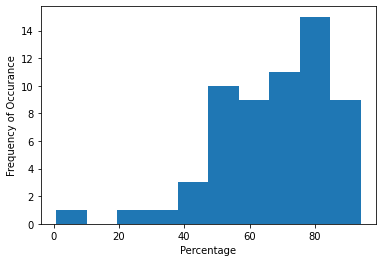

In [158]:
plt.hist(us_census.White)
plt.xlabel('Percentage')
plt.ylabel('Frequency of Occurance')

Text(0, 0.5, 'Frequency of Occurance')

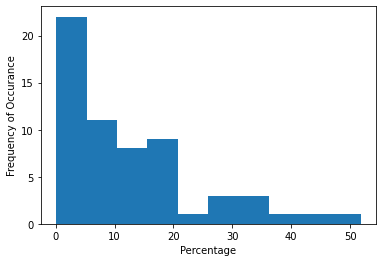

In [159]:
plt.hist(us_census.Black)
plt.xlabel('Percentage')
plt.ylabel('Frequency of Occurance')

Text(0, 0.5, 'Frequency of Occurance')

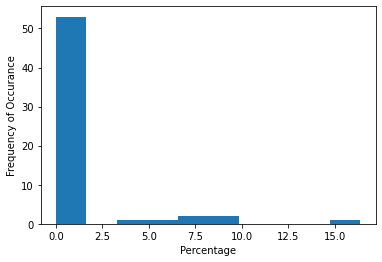

In [160]:
plt.hist(us_census.Native)
plt.xlabel('Percentage')
plt.ylabel('Frequency of Occurance')

Text(0, 0.5, 'Frequency of Occurance')

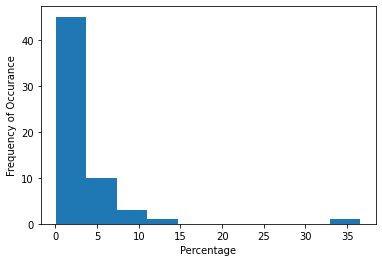

In [161]:
plt.hist(us_census.Asian)
plt.xlabel('Percentage')
plt.ylabel('Frequency of Occurance')

Text(0, 0.5, 'Frequency of Occurance')

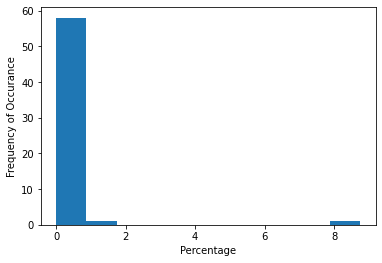

In [162]:
plt.hist(us_census.Pacific)
plt.xlabel('Percentage')
plt.ylabel('Frequency of Occurance')

Text(0, 0.5, 'Frequency of Occurance')

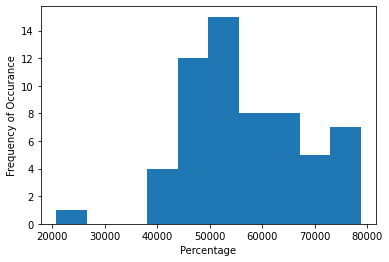

In [163]:
plt.hist(us_census.Income)
plt.xlabel('Percentage')
plt.ylabel('Frequency of Occurance')

In [ ]:
Pacific	Income  TotalPop

Text(0, 0.5, 'Frequency of Occurance')

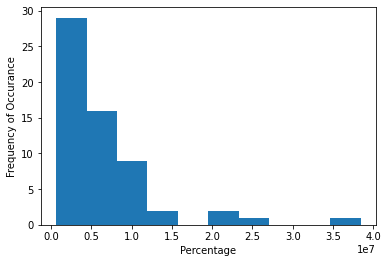

In [164]:
plt.hist(us_census.TotalPop)
plt.xlabel('Percentage')
plt.ylabel('Frequency of Occurance')

Text(0, 0.5, 'Frequency of Occurance')

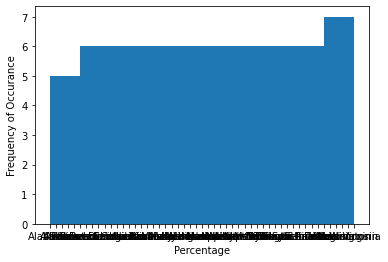

In [176]:
plt.hist(us_census.State)
plt.xlabel('Percentage')

plt.show
plt.ylabel('Frequency of Occurance')


Text(0, 0.5, 'Frequency of Occurance')

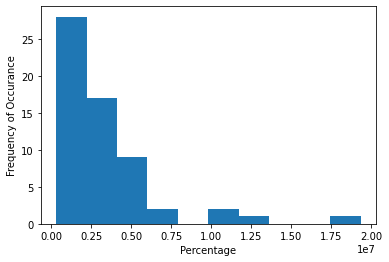

In [166]:
plt.hist(us_census.Women)
plt.xlabel('Percentage')
plt.ylabel('Frequency of Occurance')

Text(0, 0.5, 'Frequency of Occurance')

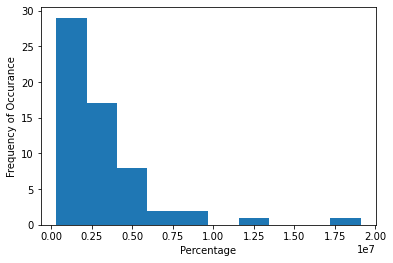

In [165]:
plt.hist(us_census.Men)
plt.xlabel('Percentage')
plt.ylabel('Frequency of Occurance')

Get Creative
15. Phew. You’ve definitely impressed your boss on your first day of work.

But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel?

Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.

In [179]:
import seaborn as sns

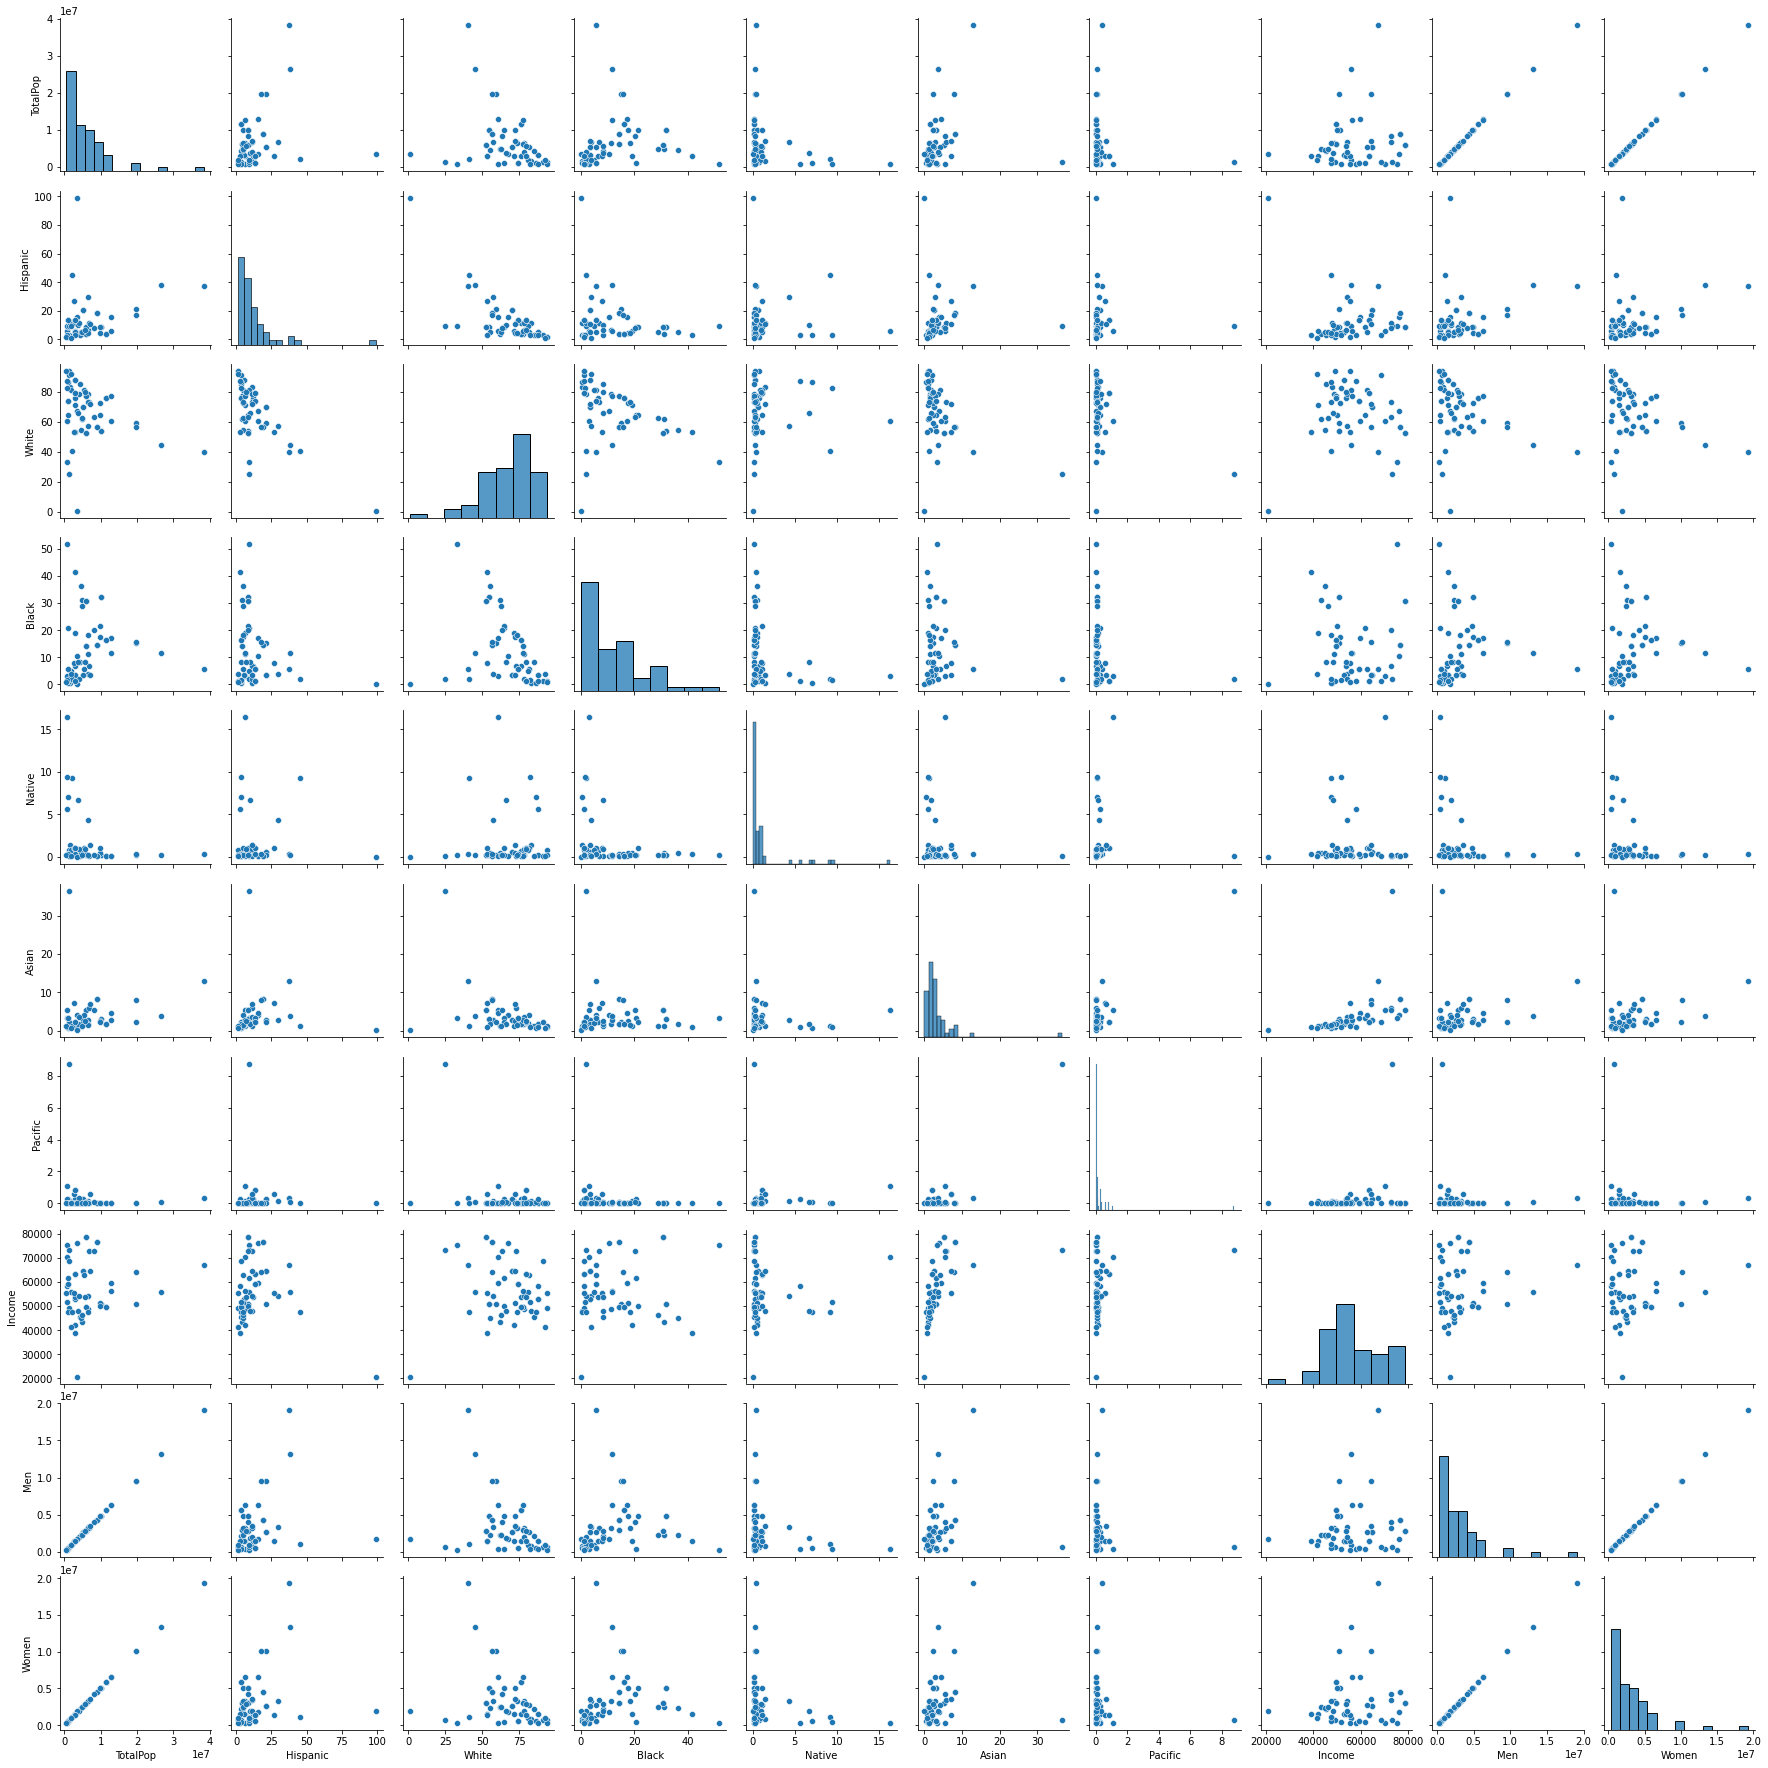

In [181]:
sns.pairplot(us_census);

# PART 2:

LEARN DATA ANALYSIS WITH PANDAS

You’re the lead data analyst for a chain of gardening stores called Petal Power. Help them analyze their inventory!

### Answer Customer Emails

1.Data for all of the locations of Petal Power is in the file inventory.csv. Load the data into a DataFrame called inventory.

In [41]:
import pandas as pd
import numpy as np

In [32]:
inventory = pd.read_csv('inventory.csv')

2.Inspect the first 10 rows of inventory.

In [33]:
inventory.head(n=10)


,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


3.The first 10 rows represent data from your Staten Island location. Select these rows and save them to staten_island.

In [34]:
staten_island = inventory[:10]
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


4.A customer just emailed you asking what products are sold at your Staten Island location. Select the column product_description from staten_island and save it to the variable product_request.

In [35]:
product_request = staten_island['product_description']
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

5.Another customer emails to ask what types of seeds are sold at the Brooklyn location.Select all rows where location is equal to Brooklyn and product_type is equal to seeds and save them to the variable seed_request




In [36]:
seed_request=inventory[(inventory.location == 'Brooklyn') & (inventory.product_type == 'seeds')]
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


6.Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.


In [37]:
inventory['in_stock'] = inventory.apply(lambda x: True if x.quantity > 0 else False, axis=1)
inventory

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False
5,Staten Island,garden tools,spade,93,19.99,True
6,Staten Island,pest_control,insect killer,74,12.99,True
7,Staten Island,pest_control,weed killer,8,23.99,True
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False
9,Staten Island,planter,8 inch plastic planter,53,3.99,True


7.Petal Power wants to know how valuable their current inventory is.
Create a column called total_value that is equal to price multiplied by quantity.


In [38]:
inventory['total_value'] = inventory.apply(lambda x: x.price * x.quantity, axis=1)
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00
5,Staten Island,garden tools,spade,93,19.99,True,1859.07
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47


8.The Marketing department wants a complete description of each product for their catalog.
The following lambda function combines product_type and product_description into a single string:
combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type, 
                     row.product_description)

Paste this function into script.py.

In [39]:
combine_lambda = lambda row: '{} - {}'.format(row.product_type, row.product_description)
combine_lambda

<function __main__.<lambda>(row)>

9. Using combine_lambda, create a new column in inventory called full_description that has the complete description of each product.



In [43]:
inventory['full_description'] = inventory.apply(combine_lambda,axis=1)
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,garden tools - spade
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,pest_control - insect killer
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,pest_control - weed killer
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,planter - 20 inch terracotta planter
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,planter - 8 inch plastic planter
